# MLP con Early Stopping y Dropout (Core)

## Descripción:

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

Enlace al dataset: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## Objetivo

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.

## Instrucciones

### 1. Carga de datos:

* Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.
* Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

### 2. Exploración y preprocesamiento de datos:

* Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

### 3. Implementación de la MLP con Dropout:

* Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
* Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
* Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

### 4. Entrenamiento del modelo:

* Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
* Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

### 5. Evaluación del modelo:

* Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
* Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

# Resolución

## 1. Carga de datos

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/heart-disease-dataset-uci" (use force=True to force download)


In [2]:
import pandas as pd


camino_ds = "../data/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv"
df = pd.read_csv(camino_ds)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

### Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

In [3]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
age,1025,0,0.0
sex,1025,0,0.0
chest_pain_type,1025,0,0.0
resting_blood_pressure,1025,0,0.0
cholestoral,1025,0,0.0
fasting_blood_sugar,1025,0,0.0
rest_ecg,1025,0,0.0
Max_heart_rate,1025,0,0.0
exercise_induced_angina,1025,0,0.0
oldpeak,1025,0,0.0


No se visualizan valores nulos en el dataset.

In [4]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'sex': ['Male' 'Female']
Valores de columna 'fasting_blood_sugar': ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
Valores de columna 'exercise_induced_angina': ['No' 'Yes']
Valores de columna 'target': [0 1]
La columna 'target' es booleana. Será convertida.
Columnas convertidas a booleanas: ['target']


In [5]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'sex': ['Male', 'Female']
Valores únicos para columna 'chest_pain_type': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['Lower than 120 mg/ml', 'Greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy']
Valores únicos para columna 'exercise_induced_angina': ['No', 'Yes']
Valores únicos para columna 'slope': ['Downsloping', 'Upsloping', 'Flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['Two', 'Zero', 'One', 'Three', 'Four']
Valores únicos para columna 'thalassemia': ['Reversable Defect', 'Fixed Defect', 'Normal', 'No']


In [6]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

In [7]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string.append(columna)

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'sex': 2
Valores únicos columna 'sex': ['male', 'female']
Se procede a convertir la columna 'sex' a categórica
Cant. únicos para columna 'chest_pain_type': 4
Valores únicos columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Se procede a convertir la columna 'chest_pain_type' a categórica
Cant. únicos para columna 'fasting_blood_sugar': 2
Valores únicos columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Se procede a convertir la columna 'fasting_blood_sugar' a categórica
Cant. únicos para columna 'rest_ecg': 3
Valores únicos columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Se procede a convertir la columna 'rest_ecg' a categórica
Cant. únicos para columna 'exercise_induced_angina': 2
Valores únicos columna 'exercise_induced_angina': ['no', 'yes']
Se procede a convertir la columna 'exercise_induced_angina' a categórica
Cant. únicos para columna

In [8]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 723


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            302 non-null    int64   
 1   sex                            302 non-null    category
 2   chest_pain_type                302 non-null    category
 3   resting_blood_pressure         302 non-null    int64   
 4   cholestoral                    302 non-null    int64   
 5   fasting_blood_sugar            302 non-null    category
 6   rest_ecg                       302 non-null    category
 7   Max_heart_rate                 302 non-null    int64   
 8   exercise_induced_angina        302 non-null    category
 9   oldpeak                        302 non-null    float64 
 10  slope                          302 non-null    category
 11  vessels_colored_by_flourosopy  302 non-null    category
 12  thalassemia                    302 non-nu

## 2. Exploración y preprocesamiento de datos:

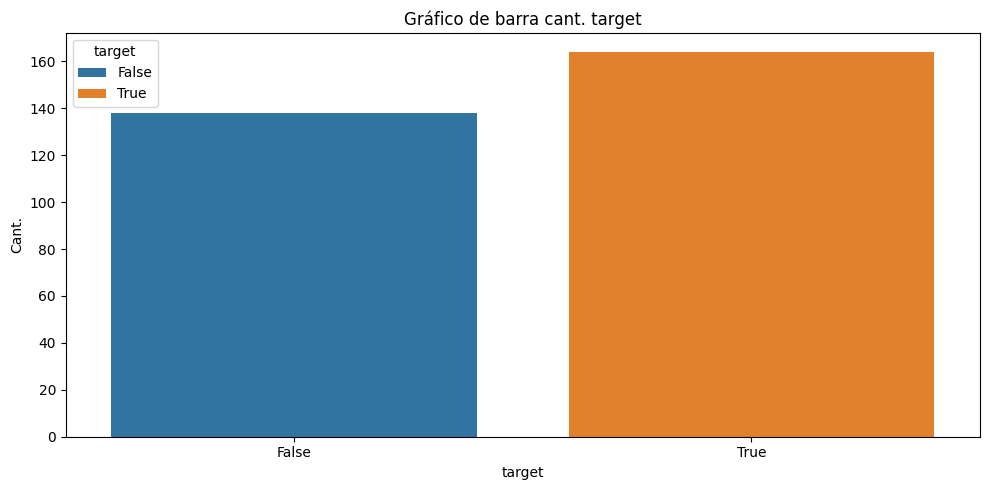

In [12]:
from utils.eda_utils import graficar_barras_conteo

graficar_barras_conteo(df, ["target"], nro_columnas=1, figsize=(10, 5))

No se visualiza desbalanceo en el dataset.

Importamos las librerías necesarias.

In [13]:
# Visualización
import matplotlib.pyplot as plt
from utils.classification_utils import graficar_matriz_confusion

# Conversión
from utils.eda_utils import obtener_columnas_numericas_df

# Modelado
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Métricas
# Evaluación
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

2024-12-08 03:51:18.967446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733629878.988505   85838 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733629878.994994   85838 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
columnas_prediccion = df.columns.tolist()
columnas_prediccion.remove("target")

In [15]:
X = df[columnas_prediccion]
y = df["target"].apply(lambda x: 1.0 if x else 0.0)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [17]:
columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    valores_unicos = df[columna].unique().tolist()
    print(f"Valores únicos para columna '{columna}': {valores_unicos}")

Valores únicos para columna 'sex': ['male', 'female']
Valores únicos para columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Valores únicos para columna 'exercise_induced_angina': ['no', 'yes']
Valores únicos para columna 'slope': ['downsloping', 'upsloping', 'flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['two', 'zero', 'one', 'three', 'four']
Valores únicos para columna 'thalassemia': ['reversable defect', 'fixed defect', 'normal', 'no']


In [18]:
columnas_ordinales = [
    "vessels_colored_by_flourosopy",
]

In [19]:
mapeo_columnas_ordinales = [
    {
        "col": "vessels_colored_by_flourosopy",
        "mapping": [
            "zero",
            "one",
            "two",
            "three",
            "four",
        ]
    },
]

In [20]:
categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            StandardScaler(),
            columnas_numericas_a_escalar,
        ),
        (
            "ordinal",
            OrdinalEncoder(categories=categories_ordinal_encoder),
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

Verificamos si las columnas se transforman correctamente.

In [21]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   scaler__age                                         302 non-null    float64
 1   scaler__resting_blood_pressure                      302 non-null    float64
 2   scaler__cholestoral                                 302 non-null    float64
 3   scaler__Max_heart_rate                              302 non-null    float64
 4   scaler__oldpeak                                     302 non-null    float64
 5   ordinal__vessels_colored_by_flourosopy              302 non-null    float64
 6   onehot__sex_female                                  302 non-null    float64
 7   onehot__sex_male                                    302 non-null    float64
 8   onehot__chest_pain_type_asymptomatic                302 non-null    float64
 9  

In [22]:
obtener_estadisticas_datos_nulos(df_transf)

,datos sin NAs en q,Na en q,Na en %
scaler__age,302,0,0.0
scaler__resting_blood_pressure,302,0,0.0
onehot__thalassemia_normal,302,0,0.0
onehot__thalassemia_no,302,0,0.0
onehot__thalassemia_fixed defect,302,0,0.0
onehot__slope_upsloping,302,0,0.0
onehot__slope_flat,302,0,0.0
onehot__slope_downsloping,302,0,0.0
onehot__exercise_induced_angina_yes,302,0,0.0
onehot__exercise_induced_angina_no,302,0,0.0


Al parecer, la transformación se realiza correctamente.

In [23]:
del X_transf
del df_transf

In [24]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [25]:
X_train_processed.shape

(241, 26)

In [26]:
model = Sequential([
    Dense(128, activation='relu', input_dim=26),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/diego/.virtualenvs/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733629881.133674   85838 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 214 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

### Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

In [27]:
# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

## 4. Entrenamiento del modelo:

### Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.

In [28]:
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1733629883.204035   85913 service.cc:148] XLA service 0x74880c00b2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733629883.204067   85913 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-08 03:51:23.240390: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733629883.433320   85913 cuda_dnn.cc:529] Loaded cuDNN version 90300


13/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5643 - loss: 0.6860 

I0000 00:00:1733629885.266666   85913 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5868 - loss: 0.6718 - val_accuracy: 0.7959 - val_loss: 0.5387
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7475 - loss: 0.5262 - val_accuracy: 0.8367 - val_loss: 0.4409
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.3799 - val_accuracy: 0.8367 - val_loss: 0.4021
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8749 - loss: 0.3327 - val_accuracy: 0.8367 - val_loss: 0.4131
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8674 - loss: 0.2780 - val_accuracy: 0.8571 - val_loss: 0.4239
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8598 - loss: 0.3206 - val_accuracy: 0.8163 - val_loss: 0.4734
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8672 - loss: 0.2683 - val_accuracy: 0.7755 - val_loss: 0.5095
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9212 - loss: 0.2126 - val_accuracy: 0.7755 - val_loss: 0.

### Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

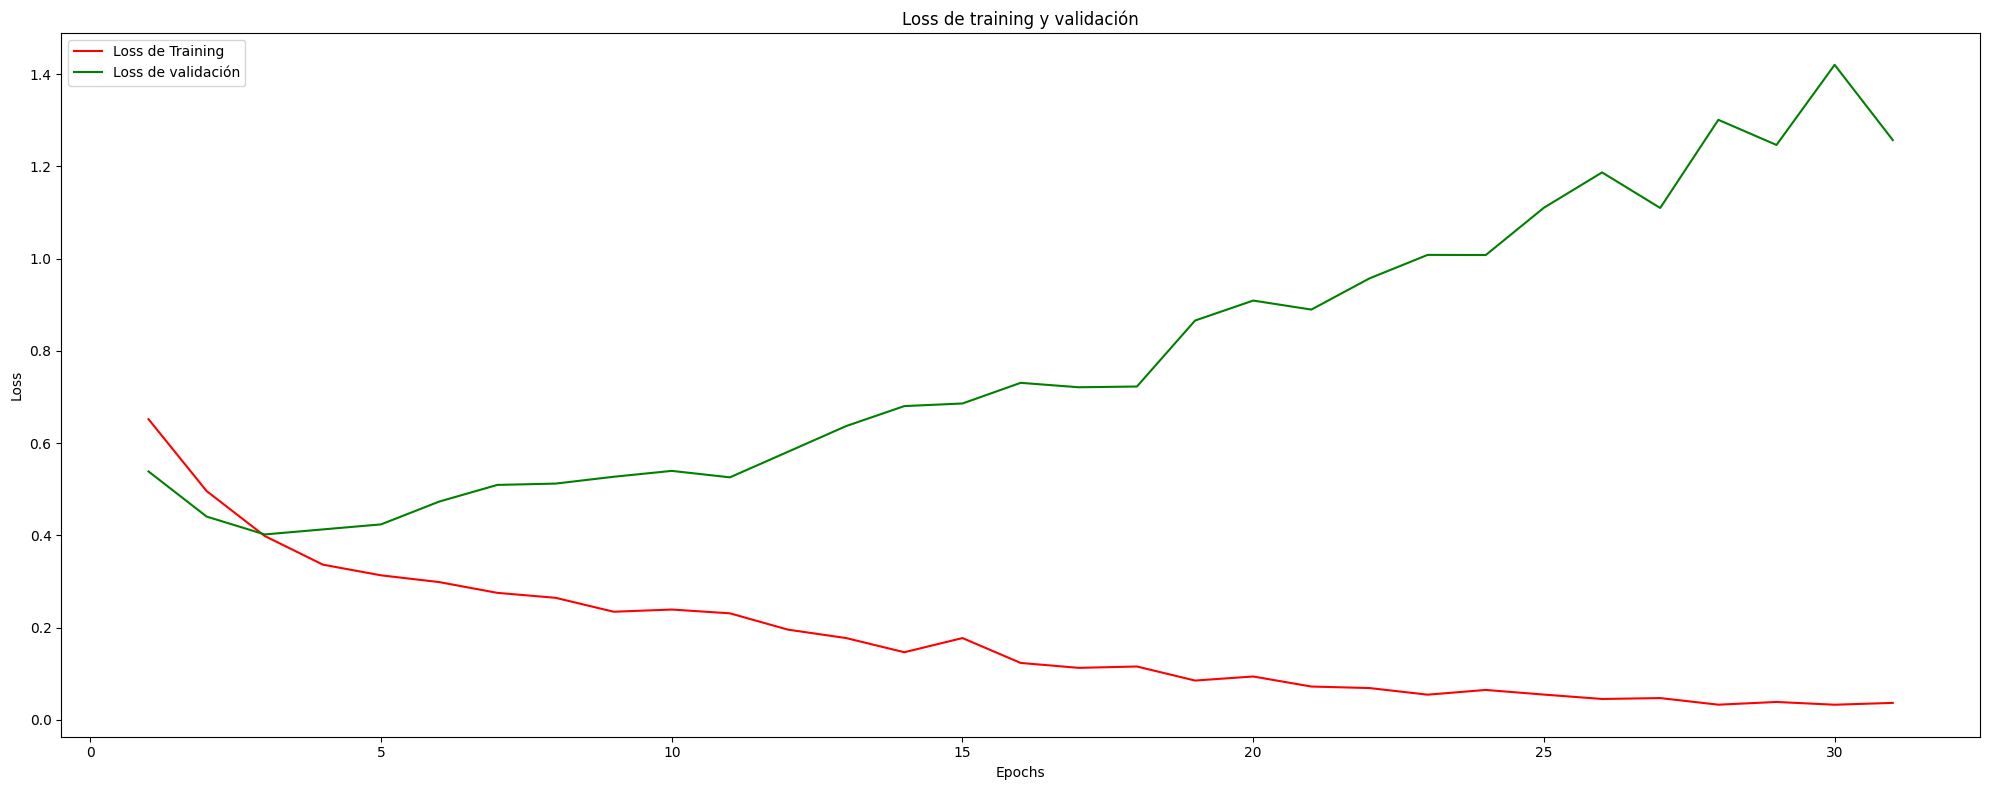

In [29]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(tr_loss))]

# Gráfico
plt.figure(figsize= (20, 8))

plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación')
plt.title('Loss de training y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Evaluación del modelo:


### Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.

In [30]:
y_pred_nn = model.predict(X_test_processed)


y_pred_nn_binarized = [1 if y > 0.95 else 0 for y in y_pred_nn]


accuracy_nn = accuracy_score(y_test, y_pred_nn_binarized)
precision_nn = precision_score(y_test, y_pred_nn_binarized)
recall_nn = recall_score(y_test, y_pred_nn_binarized)
f1_nn = f1_score(y_test, y_pred_nn_binarized)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)


print(f"Accuracy Neural Network: {accuracy_nn}")
print(f"Precision Neural Network: {precision_nn}")
print(f"Recall Neural Network: {recall_nn}")
print(f"F1 Neural Network: {f1_nn}")
print(f"ROC AUC Neural Network: {roc_auc_nn}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
Accuracy Neural Network: 0.7868852459016393
Precision Neural Network: 0.7857142857142857
Recall Neural Network: 0.7586206896551724
F1 Neural Network: 0.7719298245614035
ROC AUC Neural Network: 0.831896551724138


In [31]:
classification_report_nn = classification_report(y_test, y_pred_nn_binarized)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binarized)

print("Reporte de Clasificación Neural Network")
print(classification_report_nn)
print("Matriz de confusión Neural Network")
print(conf_matrix_nn)

Reporte de Clasificación Neural Network
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        32
         1.0       0.79      0.76      0.77        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Matriz de confusión Neural Network
[[26  6]
 [ 7 22]]


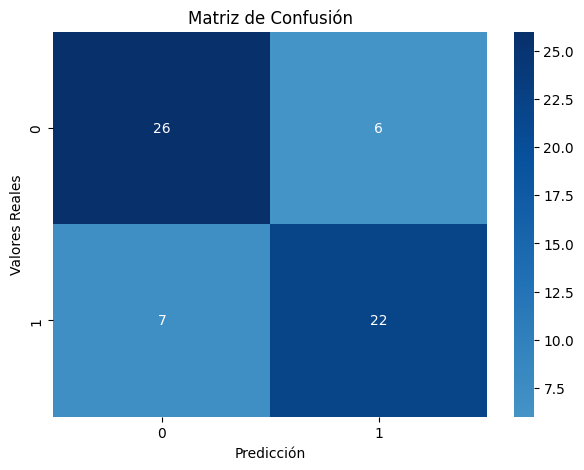

In [32]:
graficar_matriz_confusion(conf_matrix_nn, figsize=(7, 5))

### Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

Se realizaron pruebas con y sin Dropout, y el rendimiento efectivamente mejora al incluírlos en medio de las capas. La prueba del dropout se realizó comentando los dropouts y comparando el rendimiento. También, el entrenamiento paró cuando ya no se detectaban mejoras en el accuracy del modelo, evitando un procesamiento ya innecesario.